<a href="https://colab.research.google.com/github/JacobaCarr26/comp215/blob/main/Copy_of_lab05_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 5
----------------
#### Name: Jacoba
#### Date: 2025-02-05

By the end of this lab you should be able to:
  * apply both a direct (ie. brute force) and heuristic algorithm to a problem
  * use the networkx module to visualize graphs
  * measure algorithm scaling


During this lab, you will be introduced to the following:
  * seeding the random module



## The Traveling Salesperson Problem

This lab is based on the famous Traveling Salesperson Problem (TSP) outlined in Section 3.3.2 of 'On Complexity'.  Imagine you needed to travel to ten different cities.  What is the shortest possible route you could take to visit every city?  For our version of the problem, you start from a specific city and must end on the same city.

In this lab, you will implement a direct (ie. brute force) and a heuristic solution to the problem.

In [117]:
# start with some imports
import random, math, time, itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

## Set up the map

For this implementation of the problem we will randomly place N cities on a 100 by 100 grid.  Cities will be labelled using a single character; 'A', 'B', 'C', etc.  City locations will be denoted by a 2-tuple, `(x,y)`, giving their position on the grid. In order to create reproducable maps, we will use [random.seed()](https://docs.python.org/3/library/random.html#random.seed) to initialize the random module.  

In [118]:
def setup_map(N, seed=1):
  ''' Returns a map of N cities with random locations on a 100 by 100 grid '''
  random.seed(seed)
  city_locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(N)]
  city_names = [chr(65 + i) for i in range(N)]
  city_map = dict(zip(city_names, city_locations))
  return city_map

def graph_map(city_map):
  ''' graph the map of cities using networkx'''
  G = nx.Graph()
  G.add_nodes_from(city_map)
  nx.draw(G, city_map, with_labels=True)

def distance(city1, city2, city_map):
  ''' Returns the distance between two cities on a map'''
  x1, y1 = city_map[city1]
  x2, y2 = city_map[city2]
  return round(math.sqrt((x2 - x1)**2 + (y2 - y1)**2),1)

def calculate_distances(city_map):
  ''' Returns a dictionary with the distances between all pairs of cities in a map '''
  distances = {}
  for city1 in city_map:
    for city2 in city_map:
      if city1 != city2:
        # this will have duplicate distances (A,B) and (B,A)
        # these duplicates make the algorithm implememntation simpler
        distances[(city1, city2)] = distance(city1, city2, city_map)
  return distances


City Map: {'A': (17, 72), 'B': (97, 8), 'C': (32, 15), 'D': (63, 97), 'E': (57, 60), 'F': (83, 48), 'G': (100, 26), 'H': (12, 62), 'I': (3, 49), 'J': (55, 77)}
Distances between cities: {('A', 'B'): 102.4, ('A', 'C'): 58.9, ('A', 'D'): 52.4, ('A', 'E'): 41.8, ('A', 'F'): 70.2, ('A', 'G'): 94.9, ('A', 'H'): 11.2, ('A', 'I'): 26.9, ('A', 'J'): 38.3, ('B', 'A'): 102.4, ('B', 'C'): 65.4, ('B', 'D'): 95.3, ('B', 'E'): 65.6, ('B', 'F'): 42.4, ('B', 'G'): 18.2, ('B', 'H'): 100.7, ('B', 'I'): 102.6, ('B', 'J'): 80.8, ('C', 'A'): 58.9, ('C', 'B'): 65.4, ('C', 'D'): 87.7, ('C', 'E'): 51.5, ('C', 'F'): 60.7, ('C', 'G'): 68.9, ('C', 'H'): 51.1, ('C', 'I'): 44.7, ('C', 'J'): 66.1, ('D', 'A'): 52.4, ('D', 'B'): 95.3, ('D', 'C'): 87.7, ('D', 'E'): 37.5, ('D', 'F'): 52.9, ('D', 'G'): 80.1, ('D', 'H'): 61.9, ('D', 'I'): 76.8, ('D', 'J'): 21.5, ('E', 'A'): 41.8, ('E', 'B'): 65.6, ('E', 'C'): 51.5, ('E', 'D'): 37.5, ('E', 'F'): 28.6, ('E', 'G'): 54.8, ('E', 'H'): 45.0, ('E', 'I'): 55.1, ('E', 'J'): 17.1,

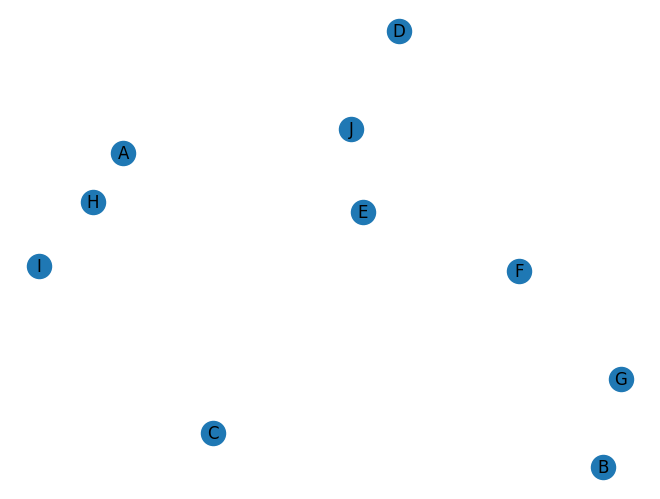

In [119]:
# test our setup functions
city_map = setup_map(10)
print(f'City Map: {city_map}')
distances = calculate_distances(city_map)
print(f'Distances between cities: {distances}')
graph_map(city_map)

### Exercise 1: The Brute Force Solution

Implement a brute force solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the brute force solution looks something like this:
 1. Loop over every possible route that starts and ends on city A.  For a three city example, this would be ABCA, ACBA.  
 2. Calculate the total distance of each possible route.  
 3. Find the route with the minimum total distance.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [120]:
# Ex. 1
from itertools import permutations
def determine_routes(city_map):
  ''' Returns a list of all possible routes that start and end on city A

  preconditions: city_map is a dictionary containing single characters as keys
  postconditions: routes are a list of strings
  '''
  city_names = list(city_map.keys())
  city_names.remove('A')  # Remove 'A' so we can control its placement

  # Generate permutations of the non-A cities only
  middle_permutations = permutations(city_names)

  # Construct the routes
  return ['A' + ''.join(middle) + 'A' for middle in middle_permutations]

def calculate_total_distance(route, city_map):
  ''' Returns the total distance of a route

  preconditions:
  route is a string of form 'ABCD',
  city_map is a dictionary containing all characters from route as keys and values are positions of form (x,y)
  postcondition:
  total_distance is a float with one decimal place
  '''
  route = list(route)
  total_distance = 0
  for i in range(len(route) - 1):
    total_distance += distance(route[i], route[i + 1], city_map)
  return total_distance

def find_shortest_route(city_map):
  ''' Returns the shortest route in a list of routes

  preconditions:
  city_map is a dictionary containing all characters from a route as keys and values are positions of form (x,y)
  postconditions:
  shortest_route is a string of form 'ABCD'
  shortest_distance is a float with one decimal place
  '''po
  routes = determine_routes(city_map)
  shortest_route = routes[0]
  shortest_distance = calculate_total_distance(shortest_route, city_map)
  for route in routes:
    route_distance = calculate_total_distance(route, city_map)
    if route_distance < shortest_distance:
      shortest_route = route
      shortest_distance = route_distance
  return shortest_route, shortest_distance


In [121]:
city_map = setup_map(10)
assert (len(determine_routes(city_map))) == math.factorial(9)
map1 = {'A': (2,2), 'B': (3,3), 'C': (4,4)}
route = 'ABCA'
assert calculate_total_distance(route, map1) == 5.6
routes = ['ABCA', 'ACBA']
assert find_shortest_route(map1) == ('ABCA', 5.6)

### Exercise 2: Nearest Neighbour

Implement a nearest neighbour solution to the traveling salesman problem using the city map and distance dictionary given above.  The algorithm for the nearest neighbour solution looks something like this:
 1. Start from the starting city.  
 2. Go to the nearest city that has not been visited.  
 3. Repeat steps 1 and 2 until all cities have been visited.

Before you start coding, think about what functions and/or class you might want to simplify your implementation of the algorithm.  Write a small test for your algorithm.

In [122]:
# Ex.2
def find_nearest_city(city_list, city_map):
  ''' Returns the nearest city to a given city

  preconditions:
  city_list is a list of strings of form 'ABCD'
  city_map is a dictionary containing all characters from city_list as keys and values are positions of form (x,y)
  postcondition:
  nearest_city is a string of form 'A'
  '''
  nearest_city = city_list[1]
  min_distance = distance(city_list[0], city_list[1], city_map)
  for i in range(len(city_list)-1):
    if distance(city_list[0], city_list[i+1], city_map) < min_distance:
      min_distance = distance(city_list[0], city_list[i+1], city_map)
      nearest_city = city_list[i+1]
  return nearest_city

def nearest_neighbour_route(city_map):
  ''' Returns the shortest route using the nearest neighbour algorithm

  precondition:
  city_map is a dictionary containing all characters from a route as keys and position values are of form (x,y)
  postconditions:
  shortest_route is a string of form 'ABCD'
  shortest_distance is a float with one decimal place
  '''
  unvisited_cities = list(city_map.keys())
  visited_cities = []
  current_city = unvisited_cities[0]
  visited_cities.append(current_city)
  while len(unvisited_cities) > 1:
    current_city = find_nearest_city(unvisited_cities, city_map)
    unvisited_cities.remove(current_city)
    visited_cities.append(current_city)
  return ''.join(visited_cities) + 'A'

def nearest_neighbour(city_map):
  ''' Returns the shortest route using the nearest neighbour algorithm

  preconditions:
  city_map is a dictionary containing all characters from route as keys and values are positions of form (x,y)
  postcondition:
  total_distance is a float with one decimal place
  '''
  route = nearest_neighbour_route(city_map)
  total_distance = round(calculate_total_distance(route, city_map), 1)
  return f'Following the nearest neighbour algorithm, the shortest route is {route} with a total distance of {total_distance}.'

In [123]:
cities = ['A', 'B', 'C', 'D']
map2 = {'A': (2,2), 'B': (4,4), 'C': (3,3), 'D': (5,5)}
assert find_nearest_city(cities, map2) == 'C'
assert nearest_neighbour_route(map2) == 'ACBDA'
assert nearest_neighbour(map2) == 'Following the nearest neighbour algorithm, the shortest route is ACBDA with a total distance of 8.4.'

### Exercise 3: Graph the Routes

Use the networkx module to create directed graphs of the routes (brute force and nearest neighbour).  Include the distances between the cities on the edges.  Run several different map setups with a different sizes (ie. number of cities).  Do the brute force (ie. direct) and nearest neighbour (ie. heuristic) algorithms always give the same solution?  Do you notice anything about the brute force solutions that suggests an alternative heuristic algorithm?


In [126]:
# Ex.3
def draw_directed_brute_force_graph(city_map):
  ''' Returns a directed graph of the brute force routes

  preconditions:
  city_map is a dictionary with keys of form 'A', 'B', etc. and position values of form (x,y)
  postconditions:
  G is a networkx directed graph
  '''
  G = nx.DiGraph()
  G.add_nodes_from(city_map)
  route = find_shortest_route(city_map)[0]
  for i in range(len(route)-1):
    G.add_edge(route[i], route[i+1], weight=distance(route[i], route[i+1], city_map))
  nx.draw(G, city_map, with_labels=True)

def draw_directed_nearest_neighbour_graph(city_map):
  ''' Returns a directed graph of the nearest neighbour routes

  preconditions:
  city_map is a dictionary with keys of form 'A', 'B', etc. and position values of form (x,y)
  postconditions:
  G is a networkx directed graph
  '''
  G = nx.DiGraph()
  G.add_nodes_from(city_map)
  route = nearest_neighbour_route(city_map)
  for i in range(len(route)-1):
    G.add_edge(route[i], route[i+1], weight=distance(route[i], route[i+1], city_map))
  nx.draw(G, city_map, with_labels=True)

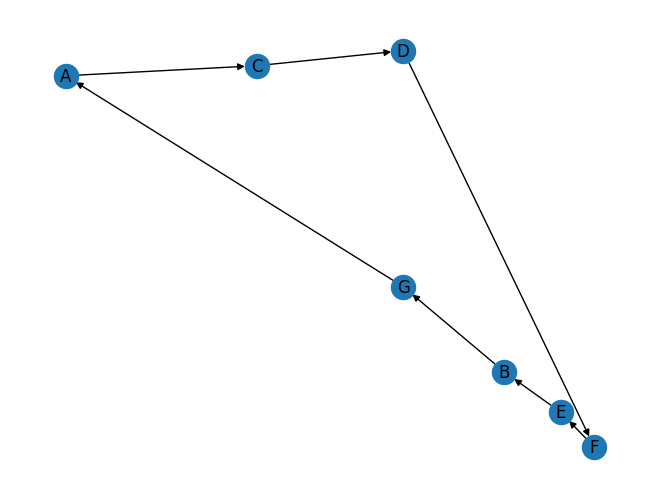

In [127]:
draw_directed_brute_force_graph(setup_map(7,3))

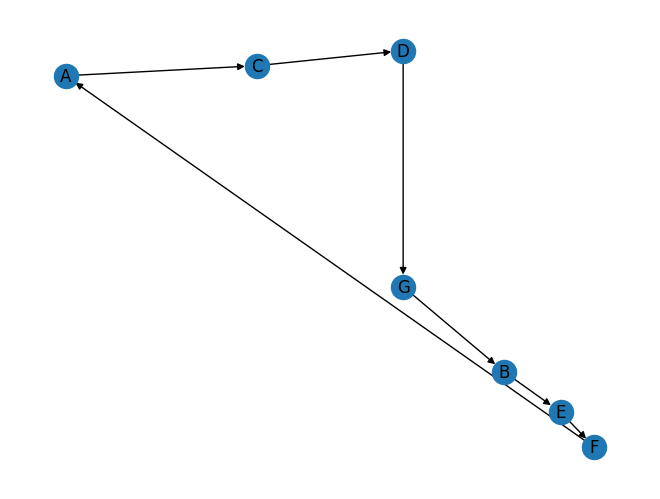

In [128]:
draw_directed_nearest_neighbour_graph(setup_map(7,3))

### Exercise 4: Algorithm Scaling

Use the `time` module to measure the running time of the two algorithms.  Note that the `time.time()` function returns the current time, so calling it before and after the algorithm has run can give you the time it takes for the algorithm to execute.  Taking the average over several trials will make the measurement more precise.  Demonstrate the scaling nature of the algorithms by plotting their execution time as a function of N, up to about N = 10.  

In [138]:
# Ex 4

def time_of_brute_force(N):
  '''Find the time it takes to complete the brute force algorithm'''
  start_time = time.time()
  find_shortest_route(setup_map(N))
  end_time = time.time()
  return end_time - start_time

def time_of_nearest_neighbour(N):
  '''Find the time it takes to complete the nearest neighbour algorithm'''
  start_time = time.time()
  nearest_neighbour(setup_map(N))
  end_time = time.time()
  return end_time - start_time

def average_time_of_brute_force(N, trials=10):
  '''Find the average time it takes to complete the brute force algorithm'''
  avg_time = 0
  for i in range(trials):
    avg_time += time_of_brute_force(N)
  avg_time /= trials
  return avg_time

def average_time_of_nearest_neighbour(N, trials=10):
  '''Find the average time it takes to complete the nearest neighbour algorithm'''
  avg_time = 0
  for i in range(trials):
    avg_time += time_of_nearest_neighbour(N)
  avg_time /= trials
  return avg_time

print(f'The average time to complete the brute force algorithm is {average_time_of_brute_force(10)} seconds.')
print(f'The average time to complete the nearest neighbour algorithm is {average_time_of_nearest_neighbour(10)} seconds.') # Notice that this values is significantly lower than brute_force

The average time to complete the brute force algorithm is 3.9883893966674804 seconds.
The average time to complete the nearest neighbour algorithm is 0.00012581348419189454 seconds.


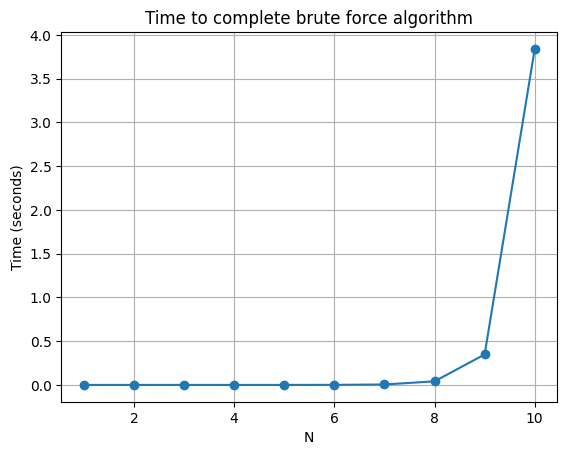

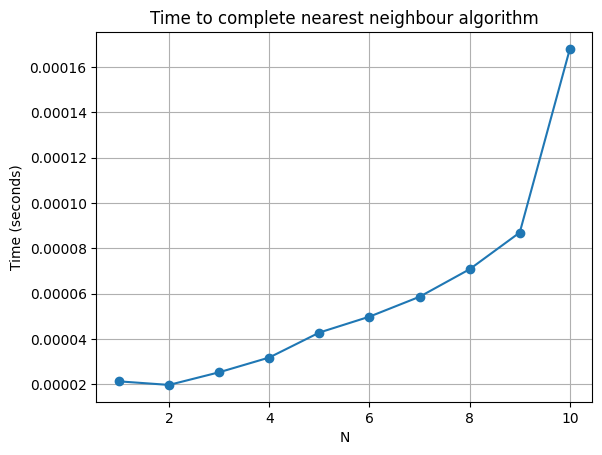

In [148]:
def plot_time_of_brute_force(N):
  '''Plot the time it takes to complete the brute force algorithm'''
  times = []
  for i in range(1, N+1):
    t = average_time_of_brute_force(i)
    times.append(t)
  plt.plot(range(1, N+1), times, marker='o', linestyle='-')
  plt.xlabel('N')
  plt.ylabel('Time (seconds)')
  plt.title('Time to complete brute force algorithm')
  plt.grid(True)
  plt.show()

def plot_time_of_nearest_neighbour(N):
	'''Plot the time it takes to complete the nearest neighbour algorithm'''
	times = []
	for i in range(1, N+1):
		t = average_time_of_nearest_neighbour(i)
		times.append(t)
	plt.plot(range(1, N+1), times, marker='o', linestyle='-')
	plt.xlabel('N')
	plt.ylabel('Time (seconds)')
	plt.title('Time to complete nearest neighbour algorithm')
	plt.grid(True)
	plt.show()

plot_time_of_brute_force(10)
plot_time_of_nearest_neighbour(10)